In [2]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

(xtrain, ytrain), (xtest, ytest) = keras.datasets.mnist.load_data()
xtrain = xtrain/xtrain.max()
xtest = xtest/xtest.max()
print(xtrain.max(),xtrain.min())
print(xtrain.shape, ytrain.shape)
print(xtest.shape, ytest.shape)

1.0 0.0
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


[0 1 2 3 4 5 6 7 8 9]
10


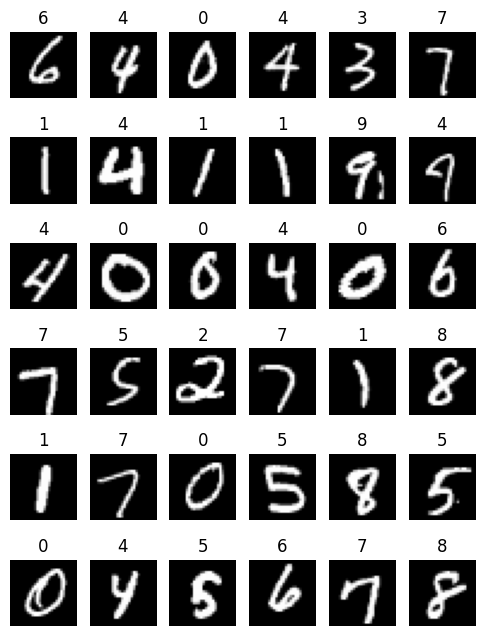

In [4]:
print(np.unique(ytrain))
print(len(np.unique(ytrain)))
plt.figure(1,(6,8))
np.random.seed(5)
for i in range(1,37):
    temp = np.random.randint(0,60000)
    im = xtrain[temp,:,:]
    lab = ytrain[temp]
    plt.subplot(6,6,i)
    plt.imshow(im, cmap='gray')
    plt.title(lab)
    plt.axis('off')
    plt.show

In [6]:

nn_model = keras.Sequential() # create an empty neural network feed forward

#framework
nn_model.add(keras.layers.Flatten(input_shape=(xtrain.shape[1],xtrain.shape[2]))) #input layer

nn_model.add(keras.layers.Dense(128,activation='relu')) #hidden layer
nn_model.add(keras.layers.Dense(256,activation='relu')) #hidden layer
nn_model.add(keras.layers.Dense(256,activation='relu')) #hidden layer

nn_model.add(keras.layers.Dense(len(np.unique(ytrain)))) #output layer

#add optimizer
nn_model.compile(optimizer="SGD", loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

print(nn_model.summary())


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               100480    
                                                                 
 dense_5 (Dense)             (None, 256)               33024     
                                                                 
 dense_6 (Dense)             (None, 256)               65792     
                                                                 
 dense_7 (Dense)             (None, 10)                2570      
                                                                 
Total params: 201866 (788.54 KB)
Trainable params: 201866 (788.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [7]:
#train the model
history = nn_model.fit(xtrain, ytrain, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 8s 3ms/step - loss: 0.6680 - accuracy: 0.8225
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2806 - accuracy: 0.9181
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2240 - accuracy: 0.9347
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1848 - accuracy: 0.9464
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1561 - accuracy: 0.9547
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1357 - accuracy: 0.9606
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1189 - accuracy: 0.9659
Epoch 8/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1060 - accuracy: 0.9691
Epoch 9/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0951 - accuracy: 0.9722
Epoch 10/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.086

Text(0, 0.5, 'Accuracy')

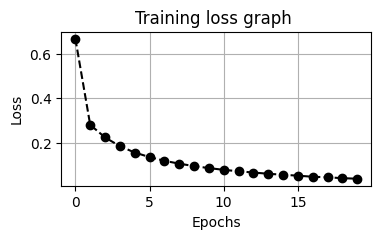

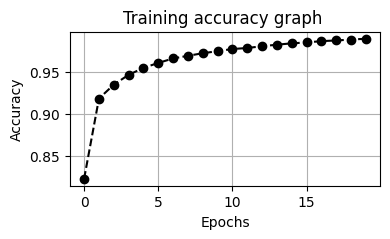

In [8]:
# visualize the training loss and acc
plt.figure(1,(4,2))

plt.plot(history.epoch,history.history['loss'],'--ko')
plt.grid('on')
plt.title('Training loss graph ')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.figure(2,(4,2))
plt.plot(history.epoch,history.history['accuracy'],'--ko')
plt.grid('on')
plt.title('Training accuracy graph ')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

In [9]:
#evaluate the test data

[loss, acc] = nn_model.evaluate(xtest, ytest)
print(f"Test loss: {loss}")
print(f"Test accuracy: {acc}")

313/313 [==============================] - 1s 2ms/step - loss: 0.0756 - accuracy: 0.9755
Test loss: 0.07558038085699081
Test accuracy: 0.9754999876022339


In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


[0.84313726 0.84705883 0.84705883 0.84705883 0.84313726 0.8352941
 0.8117647  0.6901961  0.41960785 0.3137255  0.23921569 0.14117648
 0.07450981 0.04313726 0.07450981 0.07843138 0.09019608 0.07450981
 0.06666667 0.06666667 0.07450981 0.07843138 0.07058824 0.08627451
 0.1254902  0.16078432 0.2509804  0.34901962 0.4509804  0.5019608
 0.49803922 0.5058824  0.5411765  0.5647059  0.5764706  0.5803922
 0.59607846 0.6117647  0.6117647  0.61960787 0.62352943 0.627451
 0.63529414 0.6313726  0.627451   0.627451   0.627451   0.6313726
 0.62352943 0.627451   0.62352943 0.627451   0.61960787 0.6156863
 0.6        0.59607846 0.58431375 0.5803922  0.5803922  0.56078434
 0.5568628  0.5411765  0.5294118  0.49019608 0.44705883 0.39607844
 0.2627451  0.16078432 0.11764706 0.09411765 0.10588235 0.14509805
 0.14117648 0.13725491 0.14117648 0.11764706 0.13333334 0.14117648
 0.11372549 0.08627451 0.08235294 0.0627451  0.05098039 0.05882353
 0.0627451  0.06666667 0.0627451  0.06666667 0.14117648 0.21176471
 0

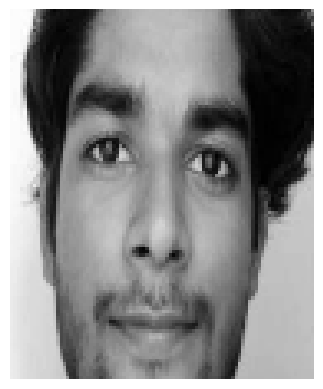

In [30]:
import matplotlib.image as mimg
import matplotlib.pyplot as plt
path = '/gdrive/MyDrive/AI_Summer_Training/orl_face/u41/3.png'
im = mimg.imread(path)
print(im[0,:])
plt.imshow(im, cmap='gray')
plt.axis('off')
plt.show()

In [31]:
import numpy as np
data = np.zeros((410,112,92))
label = np.zeros(410)
count = 0
for i in range(1,42):
  for j in range(1,11):
    path = '/gdrive/MyDrive/AI_Summer_Training/orl_face/u%d/%d.png'%(i,j)
    im = mimg.imread(path)
    data[count,:,:] = im
    label[count] = i
    count+=1

print(data.shape,label.shape)

(410, 112, 92) (410,)


In [32]:
print(len(np.unique(label)))
print(np.unique(label))
print(data.shape)

41
[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35. 36.
 37. 38. 39. 40. 41.]
(410, 112, 92)


In [33]:
from sklearn import model_selection
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

xtrain,xtest,ytrain,ytest = model_selection.train_test_split(data,label,test_size=0.3)
print(xtrain.shape, ytrain.shape)
print(xtest.shape, ytest.shape)

face_model = keras.Sequential() #empty model
#input layer
face_model.add(keras.layers.Flatten(input_shape=(xtrain.shape[1],xtrain.shape[2])))

#hidden layers
face_model.add(keras.layers.Dense(128,activation='relu'))

#output layer
face_model.add(keras.layers.Dense(len(np.unique(label))+1,activation='linear'))

# optimizer = keras.optimizers.SGD(learning_rate=0.01)
#add optimizer
face_model.compile(optimizer='SGD', loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

print(face_model.summary())


(287, 112, 92) (287,)
(123, 112, 92) (123,)
Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_12 (Flatten)        (None, 10304)             0         
                                                                 
 dense_39 (Dense)            (None, 128)               1319040   
                                                                 
 dense_40 (Dense)            (None, 42)                5418      
                                                                 
Total params: 1324458 (5.05 MB)
Trainable params: 1324458 (5.05 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [34]:
#train the model
history = face_model.fit(xtrain, ytrain, epochs=130, validation_data=(xtest,ytest))

Epoch 1/130
9/9 [==============================] - 1s 49ms/step - loss: 3.8182 - accuracy: 0.0244 - val_loss: 3.6509 - val_accuracy: 0.0569
Epoch 2/130
9/9 [==============================] - 0s 22ms/step - loss: 3.6475 - accuracy: 0.1115 - val_loss: 3.6037 - val_accuracy: 0.1463
Epoch 3/130
9/9 [==============================] - 0s 22ms/step - loss: 3.5326 - accuracy: 0.1010 - val_loss: 3.5718 - val_accuracy: 0.0813
Epoch 4/130
9/9 [==============================] - 0s 22ms/step - loss: 3.4477 - accuracy: 0.1359 - val_loss: 3.5143 - val_accuracy: 0.0976
Epoch 5/130
9/9 [==============================] - 0s 22ms/step - loss: 3.3594 - accuracy: 0.1394 - val_loss: 3.4199 - val_accuracy: 0.1545
Epoch 6/130
9/9 [==============================] - 0s 19ms/step - loss: 3.2282 - accuracy: 0.1777 - val_loss: 3.3889 - val_accuracy: 0.0976
Epoch 7/130
9/9 [==============================] - 0s 18ms/step - loss: 3.1016 - accuracy: 0.2369 - val_loss: 3.2699 - val_accuracy: 0.0813
Epoch 8/130
9/9 [===

Text(0, 0.5, 'Accuracy')

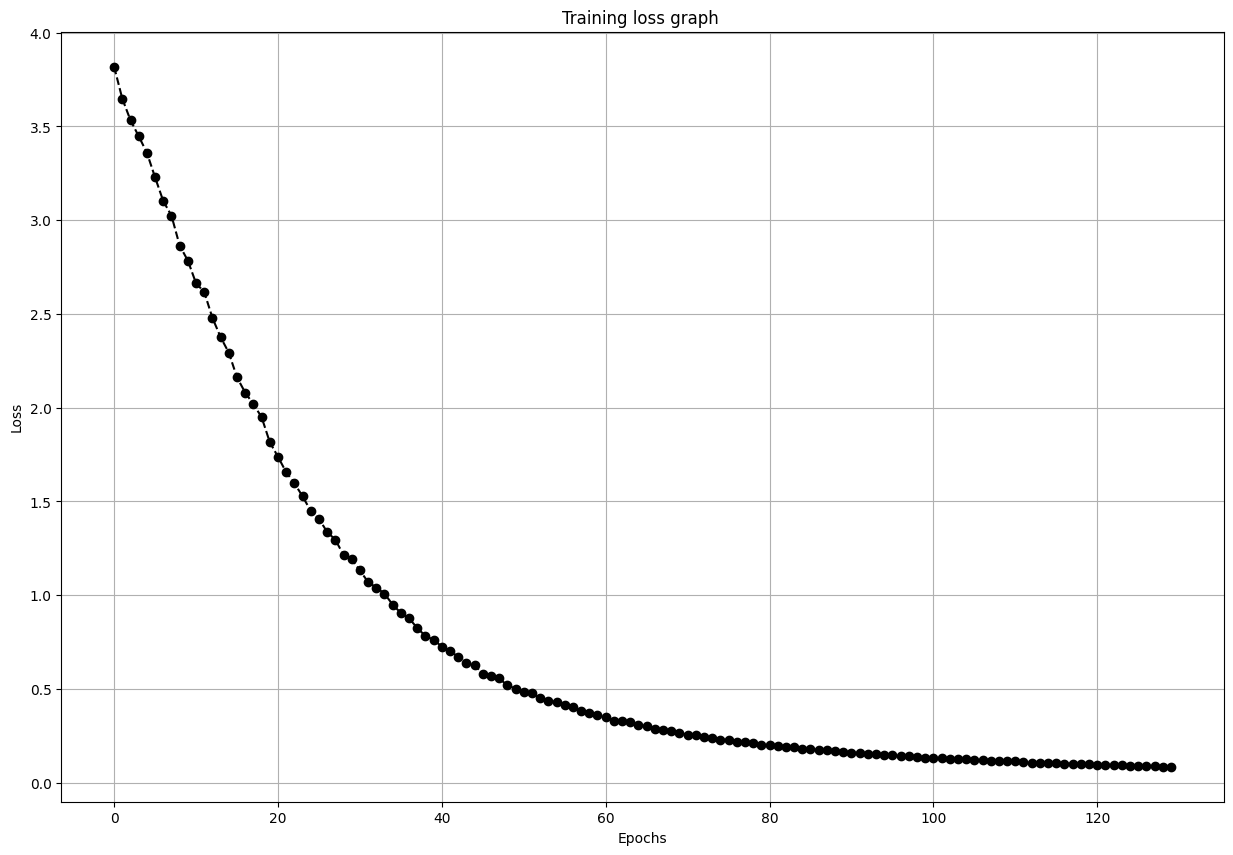

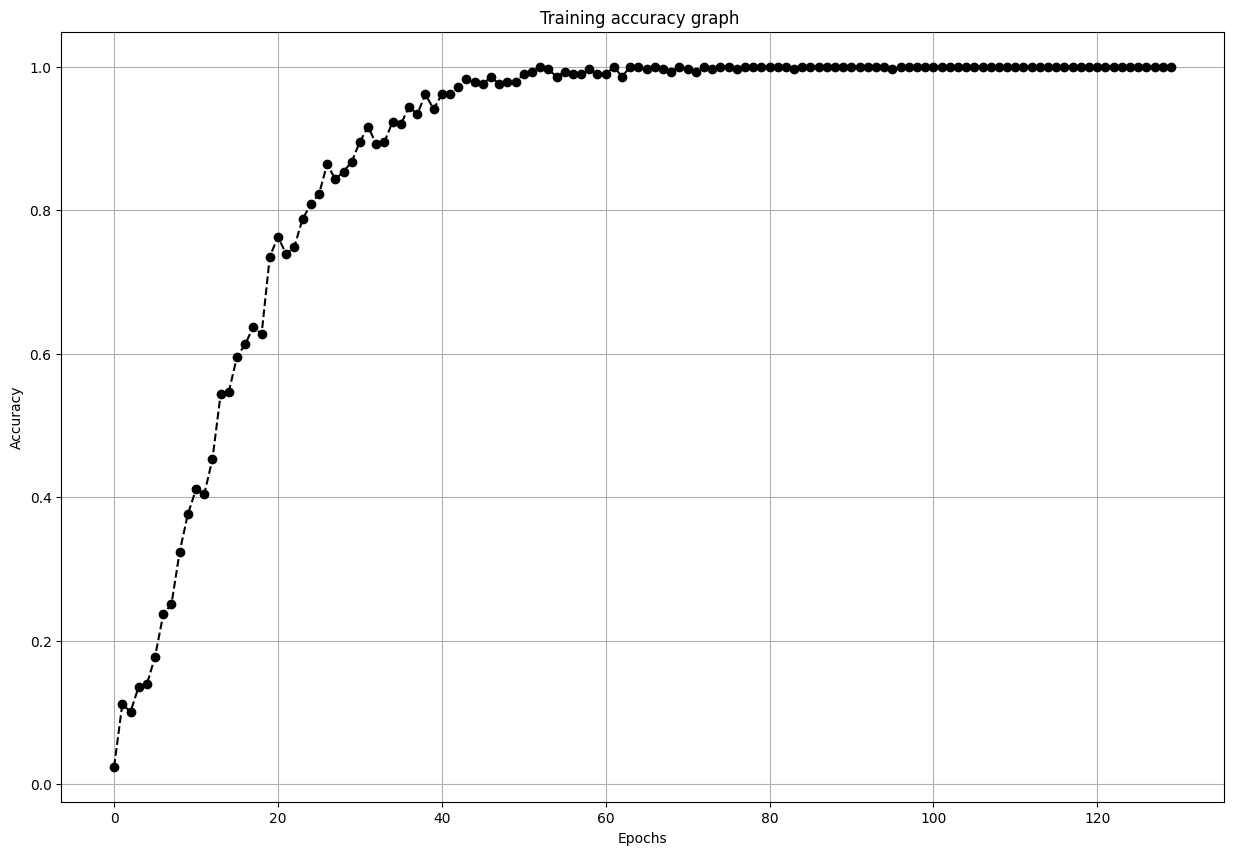

In [35]:
# visualize the training loss and acc
import matplotlib.pyplot as plt

plt.figure(1,(15,10))

plt.plot(history.epoch,history.history['loss'],'--ko')
plt.grid('on')
plt.title('Training loss graph ')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.figure(2,(15,10))
plt.plot(history.epoch,history.history['accuracy'],'--ko')
plt.grid('on')
plt.title('Training accuracy graph ')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

In [36]:
#evaluate the test data

[loss, acc] = face_model.evaluate(xtest, ytest)
print(f"Test loss: {loss}")
print(f"Test accuracy: {acc}")

4/4 [==============================] - 0s 4ms/step - loss: 0.3968 - accuracy: 0.9350
Test loss: 0.3968362808227539
Test accuracy: 0.934959352016449
